識別関数と座標のプロット

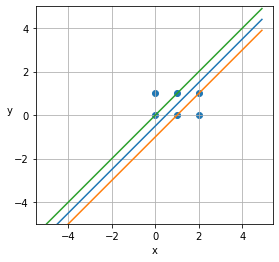

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y =x-0.5 
y1=x-1
y2=x
plt.ylim([-5, 5])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y',  rotation=0)
plt.grid()
plt.plot(x, y)
plt.plot(x,y1)
plt.plot(x,y2)

data=[[0,0],[0,1],[1,1],[1,0],[2,0],[2,1]]
X,Y=zip(*data)
plt.scatter(X,Y)
plt.show()


ここからPythonでの実験　

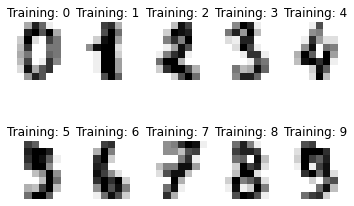

In [ ]:
#Scikit learnのライブラリに含まれているサンプルデータをロード
from sklearn import datasets
import matplotlib.pyplot as plt #可視化用
digits=datasets.load_digits()
images_and_labels=list(zip(digits.images,digits.target))
for index,(image,label) in enumerate(images_and_labels[:10]): #0～9までの読み込み
    plt.subplot(2,5,index+1)
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.axis('off')
    plt.title('Training: %i' % label)
plt.show()

In [ ]:
from sklearn import datasets,svm
digits=datasets.load_digits()
n_train=len(digits.data)*2//3#データの2/3の個数
X_train=digits.data[:n_train]#dataの前半2/3
y_train=digits.target[:n_train]#targetの前半2/3
X_test=digits.data[n_train:]#dataの後半1/3
y_test=digits.target[n_train:]#targetの後半1/3
#print([d.shape for d in [X_train,y_train,X_test,y_test]])
clf=svm.SVC(gamma=0.001,C=100.0)
"""gamma:この値が大きいほど協会が複雑になる
   C:どれだけ誤分類を許すかのパラメータ(値が大きいほど厳しい)
"""
#SVMの学習
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))#正答率？
predicted=clf.predict(X_test)#分類結果の取り出し
(y_test != predicted).sum() #誤検出した総数

0.9682804674457429


19

In [ ]:
#学習させた結果
from sklearn import metrics as met
print(met.classification_report(y_test,predicted))
print(met.confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        60
           3       0.96      0.85      0.91        62
           4       0.98      0.95      0.97        62
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        61
           7       0.98      1.00      0.99        61
           8       0.90      0.98      0.94        55
           9       0.95      0.97      0.96        58

    accuracy                           0.97       599
   macro avg       0.97      0.97      0.97       599
weighted avg       0.97      0.97      0.97       599

[[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 53  0  2  0  1  6  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  0  0

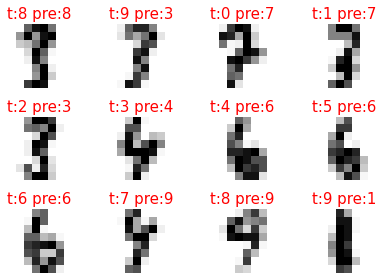

In [ ]:
#誤検出が目立った部分の可視化
imgs_yt_preds=list(zip(digits.images[n_train:],y_train,predicted))
for index,(image,y_t,pred) in enumerate(imgs_yt_preds[404:416]):
    plt.subplot(3,4,index+1)#3x4で表示
    plt.axis("off")
    plt.tight_layout()
    plt.imshow(image,cmap="Greys",interpolation="nearest")
    plt.title(f"t:{y_t} pre:{pred}",fontsize=15,color="red")
plt.show()